In [2]:
import fireducks.pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box
import matplotlib.pyplot as plt

Here we import everything we need, 

In [ ]:
# Load geospatial data using Geopandas
gdf = gpd.read_file('../data/india_ds.shp')

# Convert to FireDucks DataFrame
fdf = pd.from_pandas(gdf)


Importing the shape file and coverting from geospatial to fireducks data frame


In [4]:
type(gdf)


In [5]:
fdf

In [6]:
# Define a bounding box for the region of interest
minx, miny, maxx, maxy = -74.25909, 40.477399, -73.700272, 40.916178

# Define the bounding box using Shapely
bbox = box(minx, miny, maxx, maxy)

# Convert back to GeoPandas for geometry-based operations
gdf_back = fdf.to_pandas()

# Perform spatial filtering using GeoPandas
cities_in_region = gdf_back[gdf_back['geometry'].intersects(bbox)]


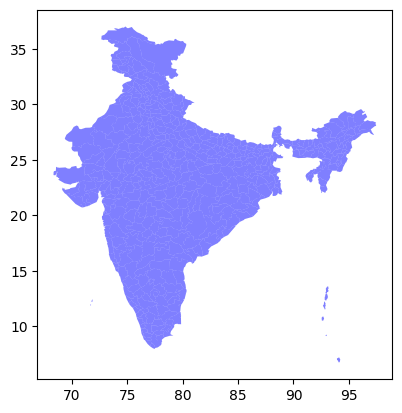

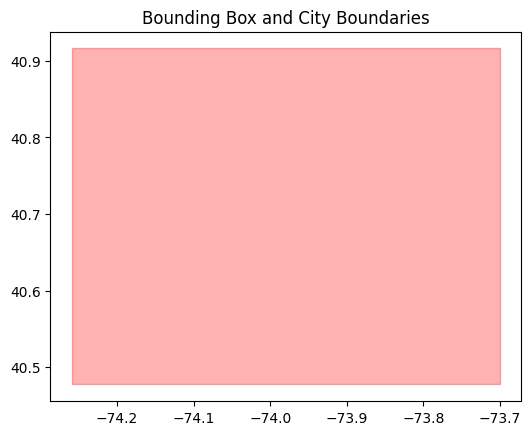

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plot the bounding box and city data
gdf.plot(color='blue', alpha=0.5)
gpd.GeoSeries(bbox).plot(color='red', alpha=0.3, edgecolor='red')
plt.title('Bounding Box and City Boundaries')
plt.show()


In [11]:
import time

# Benchmark using GeoPandas
start_time = time.time()
cities_in_region_gpd = gdf[gdf['geometry'].intersects(bbox)]
gpd_time = time.time() - start_time
print(f"GeoPandas Execution Time: {gpd_time} seconds")

# Benchmark using FireDucks
start_time = time.time()
cities_in_region_fd = fdf[fdf.intersects(bbox)]
fd_time = time.time() - start_time
print(f"FireDucks Execution Time: {fd_time} seconds")


GeoPandas Execution Time: 0.0017774105072021484 seconds
FireDucks Execution Time: 0.0009362697601318359 seconds


In [24]:
import sys

gpd_memory = sys.getsizeof(gdf)
fd_memory = sys.getsizeof(fdf)
print("GeoPandas Memory:",gpd_memory)
print("FireDucks Memory:", fd_memory)


GeoPandas Memory: 64065
FireDucks Memory: 48


In [2]:
import geopandas as gpd
import fireducks.pandas as pd
from shapely.geometry import box
import time

# Load geospatial data
gdf = gpd.read_file('extracted_folder/India Shape/india_ds.shp')
fdf = pd.from_pandas(gdf)

# Define bounding box
minx, miny, maxx, maxy = -74.25909, 40.477399, -73.700272, 40.916178
bbox = box(minx, miny, maxx, maxy)


In [3]:
import numpy as np

geo_times = []
fireducks_times = []

for _ in range(50):
    # GeoPandas timing
    start_time = time.time()
    gdf[gdf['geometry'].intersects(bbox)]
    geo_times.append(time.time() - start_time)

    # FireDucks timing
    start_time = time.time()
    fdf[fdf.intersects(bbox)]
    fireducks_times.append(time.time() - start_time)


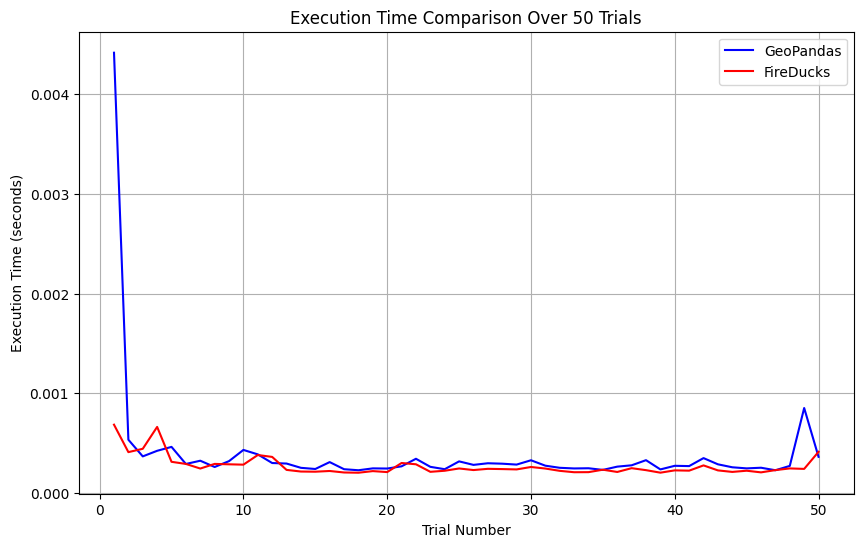

In [4]:
import matplotlib.pyplot as plt

trials = np.arange(1, 51)

plt.figure(figsize=(10, 6))
plt.plot(trials, geo_times, label='GeoPandas', color='blue')
plt.plot(trials, fireducks_times, label='FireDucks', color='red')
plt.xlabel('Trial Number')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison Over 50 Trials')
plt.legend()
plt.grid(True)
plt.savefig('performance_comparison.png')
plt.show()


In [5]:
from PIL import Image

frames = []

for i in range(1, 51):
    plt.figure(figsize=(10, 6))
    plt.plot(trials[:i], geo_times[:i], label='GeoPandas', color='blue')
    plt.plot(trials[:i], fireducks_times[:i], label='FireDucks', color='red')
    plt.xlabel('Trial Number')
    plt.ylabel('Execution Time (seconds)')
    plt.title(f'Execution Time Comparison - Trial {i}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'frame_{i}.png')
    frames.append(Image.open(f'frame_{i}.png'))
    plt.close()

frames[0].save('performance_comparison.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)


In [6]:
import geopandas as gpd
import fireducks.pandas as pd
import sys

# Define a function to measure memory usage
def get_memory_usage(obj):
    return sys.getsizeof(obj)



In [7]:
import numpy as np

geo_memory_usages = []
fireducks_memory_usages = []

for _ in range(50):
    # GeoPandas memory usage
    gdf = gpd.read_file('extracted_folder/India Shape/india_ds.shp')
    geo_memory_usages.append(get_memory_usage(gdf))

    # FireDucks memory usage
    fdf = pd.from_pandas(gdf)
    fireducks_memory_usages.append(get_memory_usage(fdf))


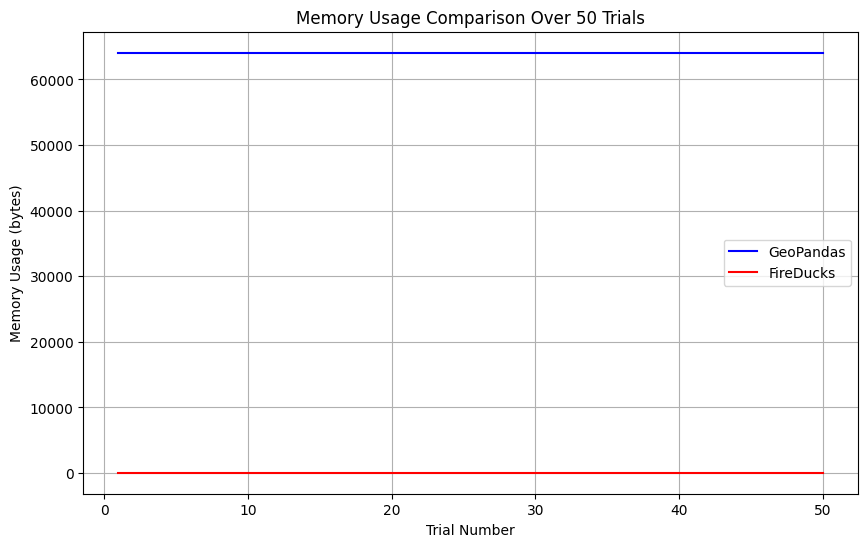

In [8]:
import matplotlib.pyplot as plt

trials = np.arange(1, 51)

plt.figure(figsize=(10, 6))
plt.plot(trials, geo_memory_usages, label='GeoPandas', color='blue')
plt.plot(trials, fireducks_memory_usages, label='FireDucks', color='red')
plt.xlabel('Trial Number')
plt.ylabel('Memory Usage (bytes)')
plt.title('Memory Usage Comparison Over 50 Trials')
plt.legend()
plt.grid(True)
plt.savefig('memory_usage_comparison.png')
plt.show()


In [9]:
from PIL import Image

frames = []

for i in range(1, 51):
    plt.figure(figsize=(10, 6))
    plt.plot(trials[:i], geo_memory_usages[:i], label='GeoPandas', color='blue')
    plt.plot(trials[:i], fireducks_memory_usages[:i], label='FireDucks', color='red')
    plt.xlabel('Trial Number')
    plt.ylabel('Memory Usage (bytes)')
    plt.title(f'Memory Usage Comparison - Trial {i}')
    plt.legend()
    plt.grid(True)
    plt.savefig(f'frame_{i}.png')
    frames.append(Image.open(f'frame_{i}.png'))
    plt.close()

frames[0].save('memory_usage_comparison.gif', save_all=True, append_images=frames[1:], duration=200, loop=0)


In [11]:
 # Example, replace with actual memory

print("GeoPandas Time:", gpd_time)
print("FireDucks Time:", fd_time)
print("GeoPandas Memory:", gpd_memory)
print("FireDucks Memory:", fd_memory)


In [ ]:
import geopandas as gpd
import fireducks.pandas as pd
from shapely.geometry import box
import time
import numpy as np
import sys

# Load geospatial data
gdf = gpd.read_file('extracted_folder/India Shape/india_ds.shp')
fdf = pd.from_pandas(gdf)

# Define bounding box
minx, miny, maxx, maxy = -74.25909, 40.477399, -73.700272, 40.916178
bbox = box(minx, miny, maxx, maxy)

# Functions to measure memory usage
def get_memory_usage(obj):
    return sys.getsizeof(obj)

# Lists to store results
geo_times = []
fireducks_times = []
geo_memory_usages = []
fireducks_memory_usages = []

# Perform trials
for _ in range(50):
    # GeoPandas timing and memory
    start_time = time.time()
    gdf[gdf['geometry'].intersects(bbox)]
    geo_times.append(time.time() - start_time)
    geo_memory_usages.append(get_memory_usage(gdf))

    # FireDucks timing and memory
    start_time = time.time()
    fdf[fdf.intersects(bbox)]
    fireducks_times.append(time.time() - start_time)
    fireducks_memory_usages.append(get_memory_usage(fdf))

# Calculate averages
avg_geo_time = np.mean(geo_times)
avg_fireducks_time = np.mean(fireducks_times)
avg_geo_memory = np.mean(geo_memory_usages)
avg_fireducks_memory = np.mean(fireducks_memory_usages)

# Print results
print(f"Average GeoPandas Time: {avg_geo_time:.4f} seconds")
print(f"Average FireDucks Time: {avg_fireducks_time:.4f} seconds")
print(f"Average GeoPandas Memory: {avg_geo_memory:.2f} bytes")
print(f"Average FireDucks Memory: {avg_fireducks_memory:.2f} bytes")


Average GeoPandas Time: 0.0003 seconds
Average FireDucks Time: 0.0003 seconds
Average GeoPandas Memory: 64065.00 bytes
Average FireDucks Memory: 48.00 bytes
